# First Project: Predictive Analytics

- **Nama:** Rahman Ilyas Al Kahfi
- **Email:** ilyasalkahfi98@gmail.com
- **ID Dicoding:** kahfii

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Understanding

### Data Loading

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Exploratory Data Analysis (EDA)

Perform EDA for variable description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

EDA to handle missing values and outliers

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
numerical_columns = ['N', 'P', 'K',	'temperature', 'humidity' ,	'ph' , 'rainfall']
categorical_columns = ['label']

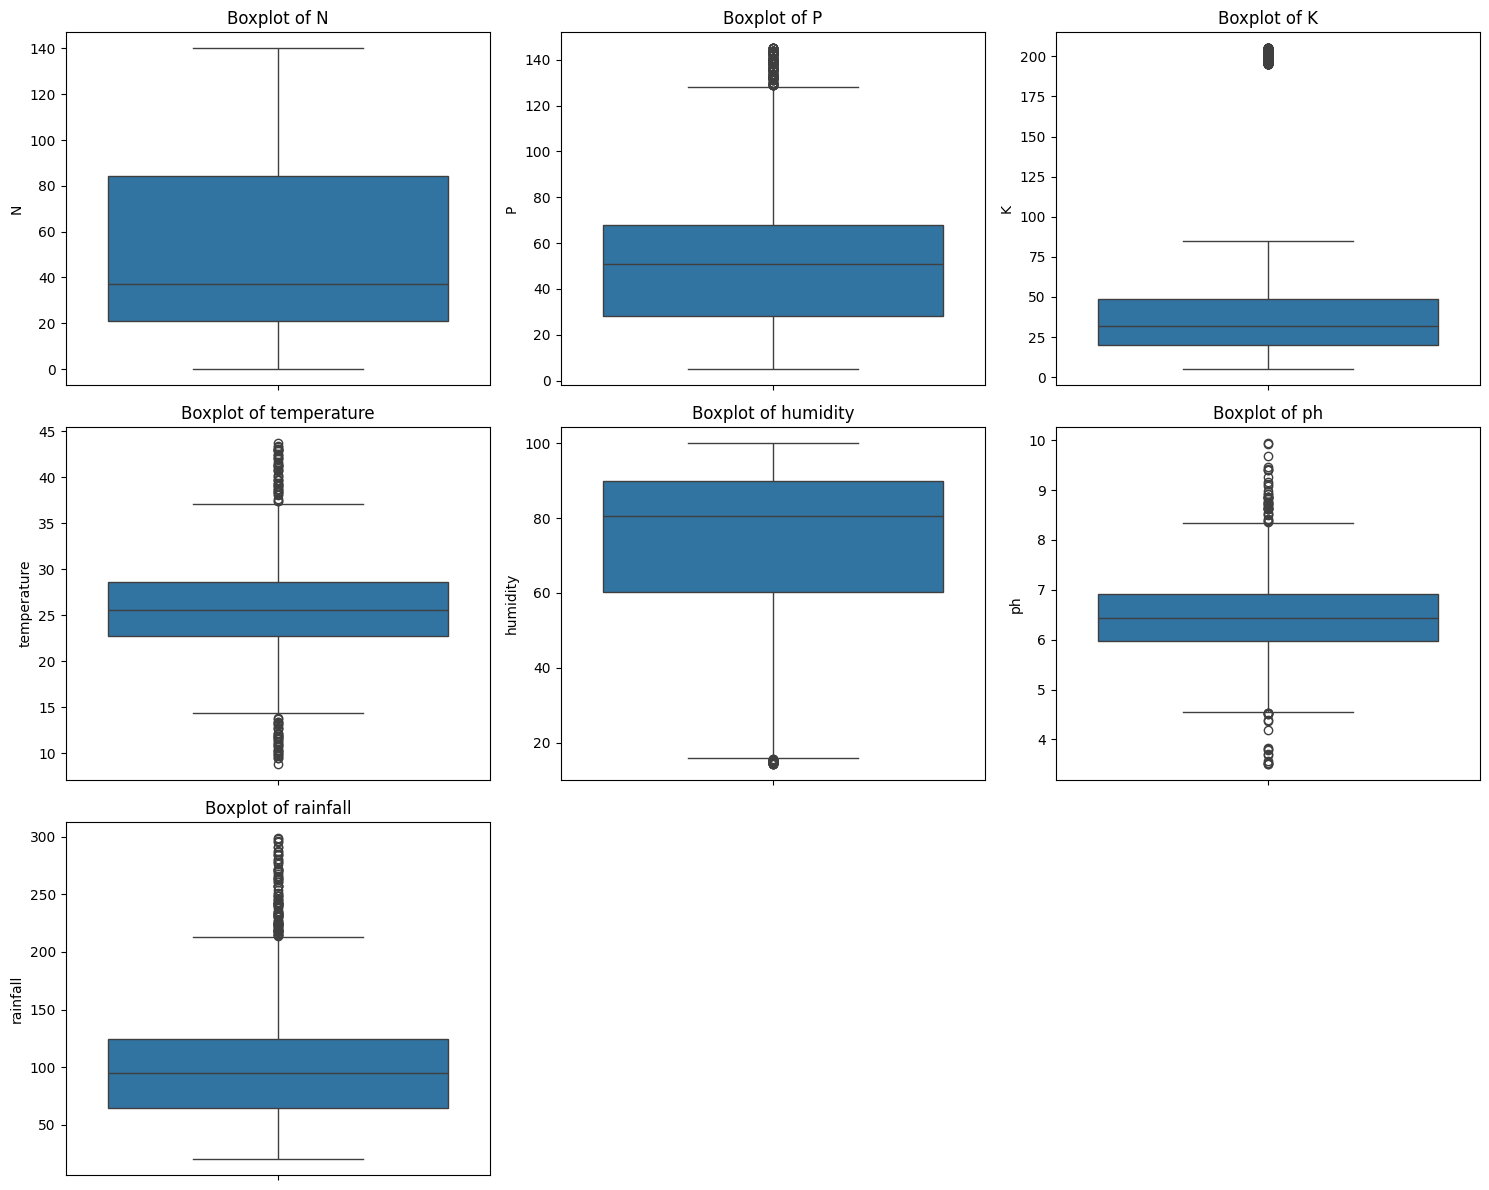

In [8]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1) 
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Perform EDA with univariate analysis

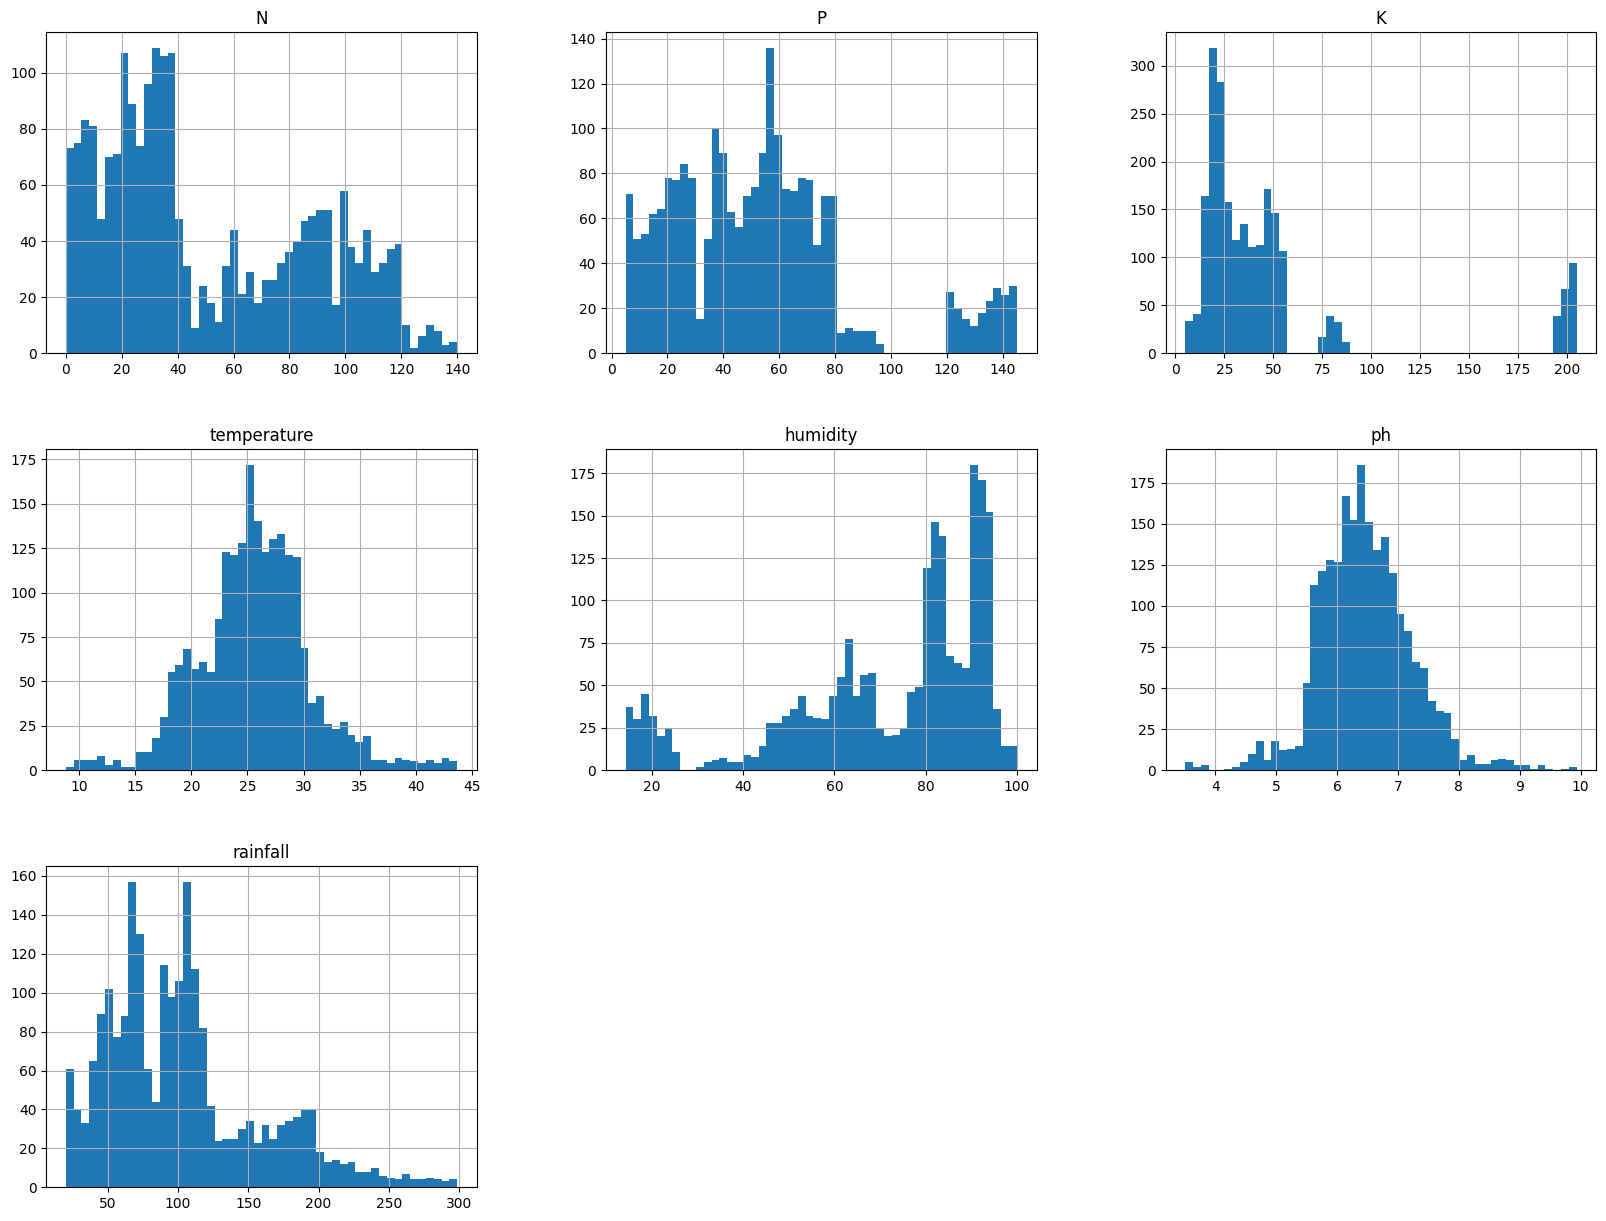

In [9]:
df[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

Perform EDA with Multivariate analysis

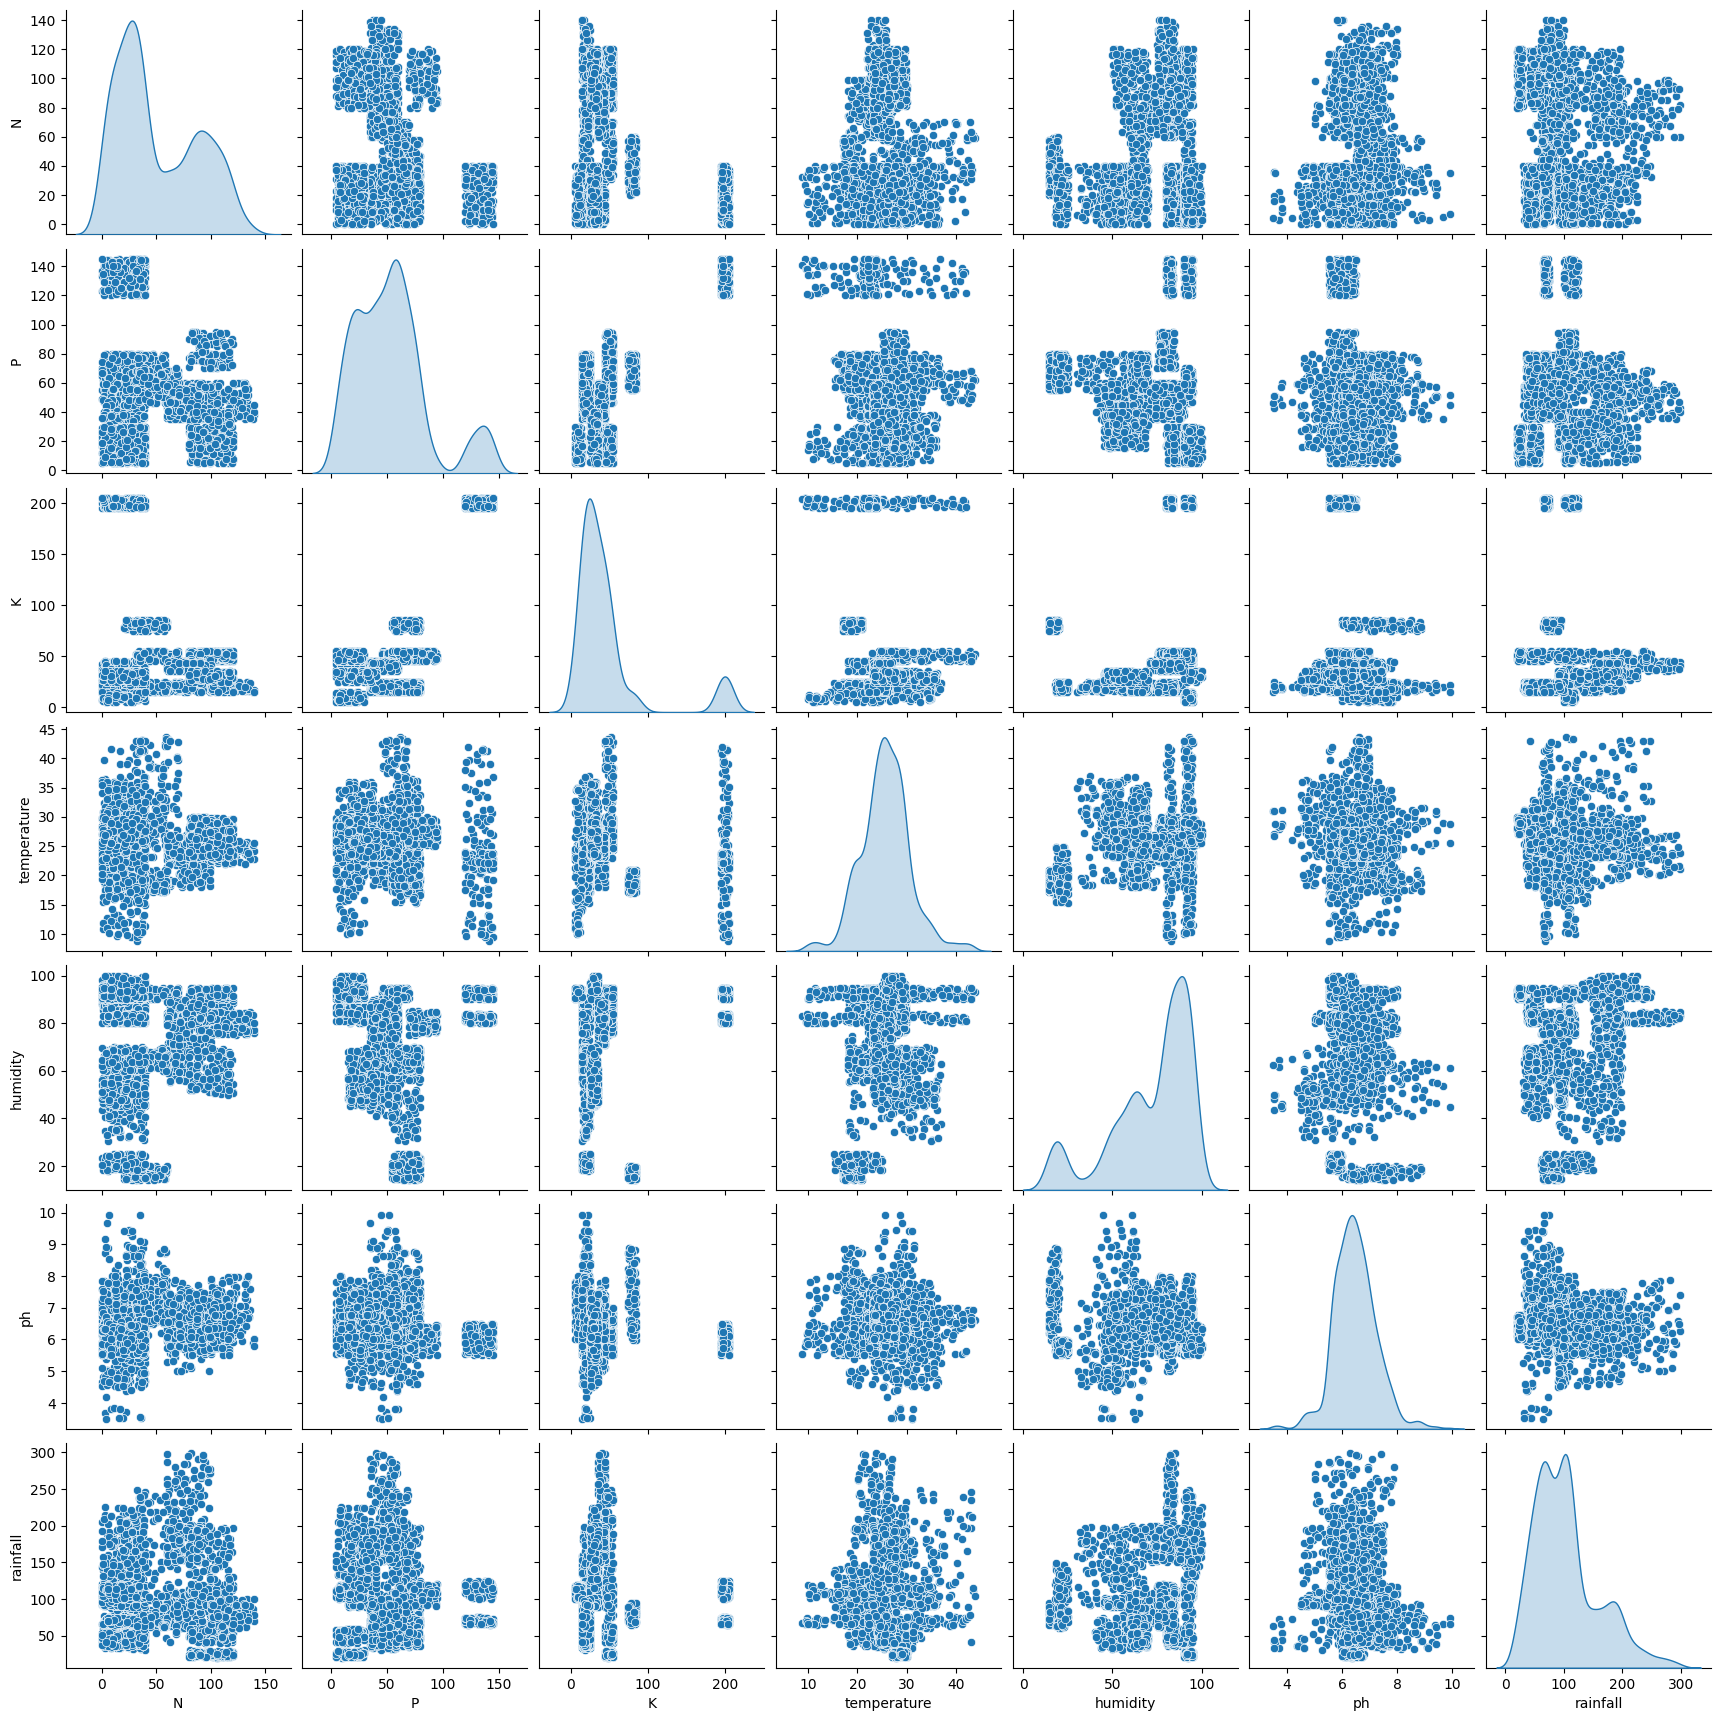

In [10]:
sns.pairplot(df[numerical_columns], diag_kind = 'kde')

<Axes: >

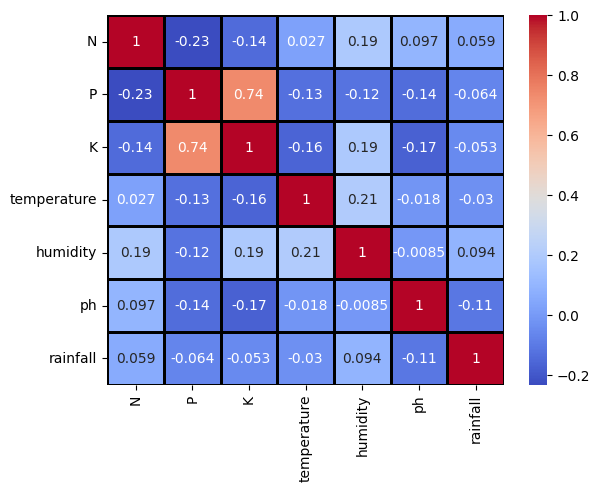

In [11]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linecolor='black', linewidths=1)

## Data Preparation

Removing Outliers

In [12]:
z_scores = np.abs(zscore(df[numerical_columns]))

In [13]:
df_no_outliers = df[(z_scores < 3).all(axis=1)]

In [14]:
print("Sebelum:", df.shape)
print("Sesudah:", df_no_outliers.shape)

Sebelum: (2200, 8)
Sesudah: (2029, 8)


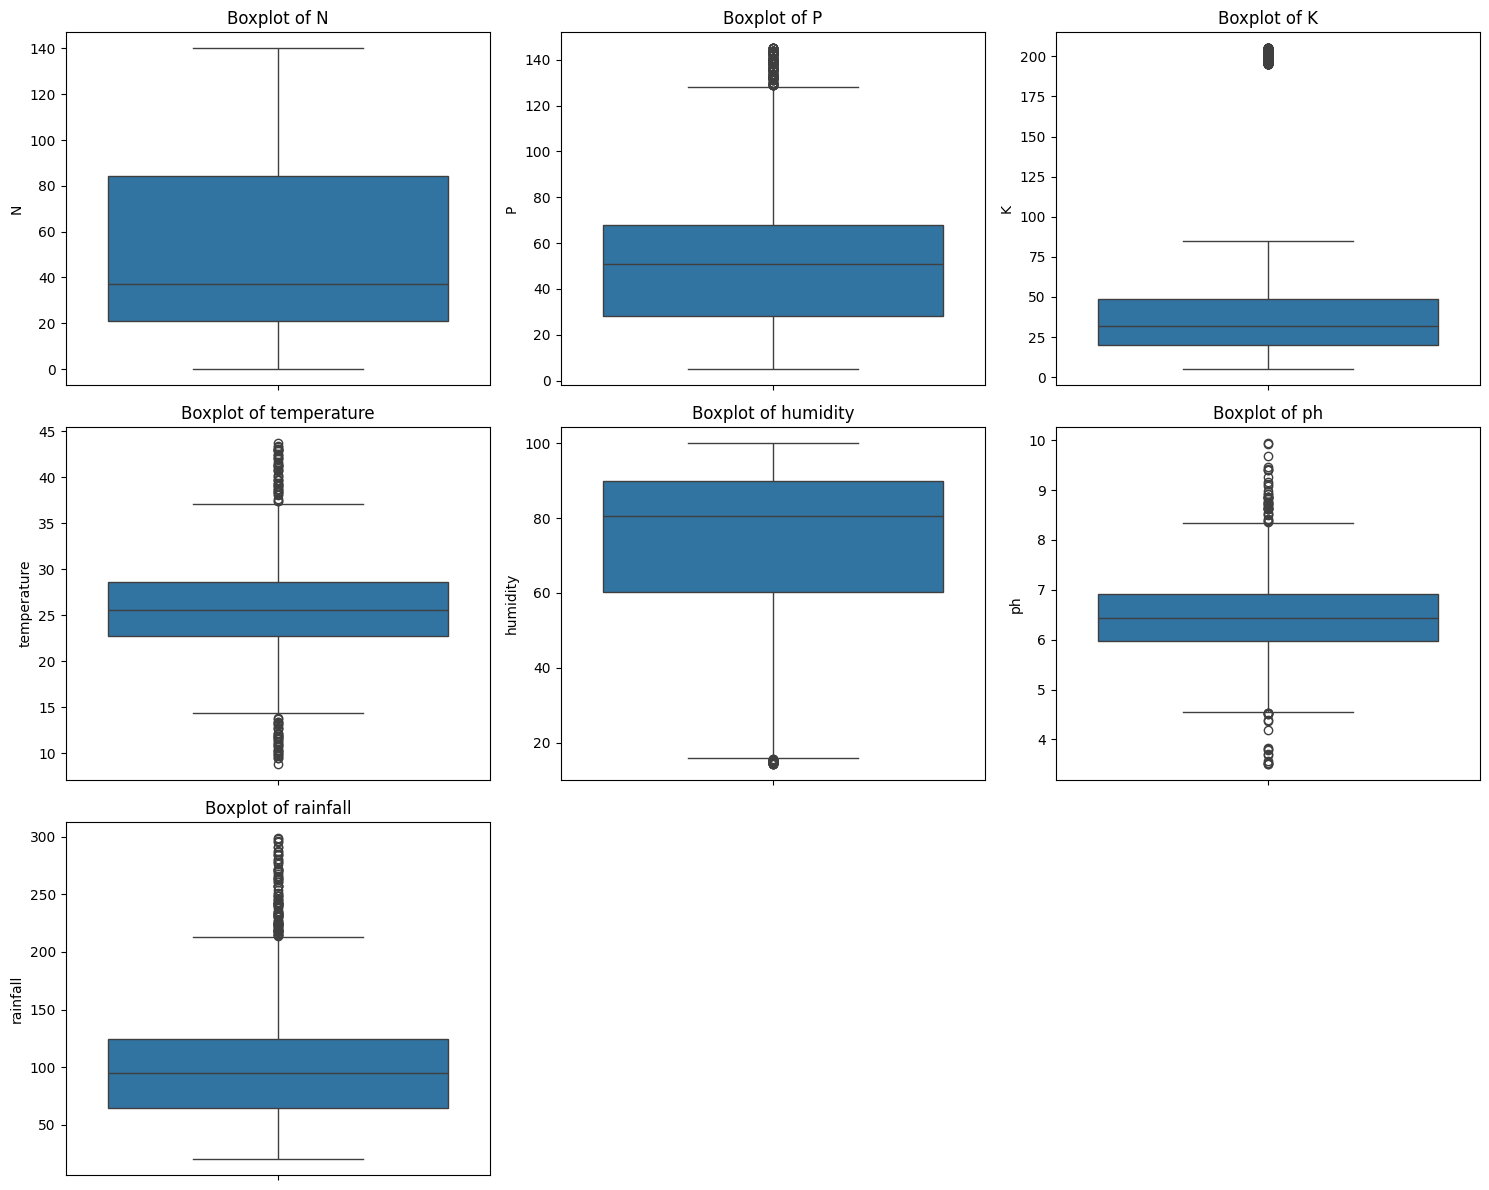

In [15]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1) 
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [16]:
df_no_outliers['label'].value_counts()

label
mango          100
pomegranate    100
jute           100
cotton         100
coconut        100
muskmelon      100
watermelon     100
maize          100
banana         100
coffee         100
lentil         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
chickpea        97
orange          96
papaya          83
rice            78
mothbeans       73
apple           57
grapes          45
Name: count, dtype: int64

label Encode target column

In [17]:
le = LabelEncoder()
df_no_outliers['label'] = le.fit_transform(df_no_outliers['label'])

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_28100\3486510539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['label'] = le.fit_transform(df_no_outliers['label'])


In [18]:
df_no_outliers.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [19]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

Split data

In [20]:
df_no_outliers.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [21]:
x = df_no_outliers.drop(['label'], axis=1)
y = df_no_outliers['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x.head(5)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [23]:
y.head(5)

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int32

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1853,24,27,34,28.878630,95.113203,6.203377,145.058312
940,39,30,38,20.126449,87.596296,6.965157,108.065579
795,58,73,16,33.369844,65.677182,6.874142,64.895175
593,18,36,23,24.018254,53.766234,7.214079,35.034044
2103,108,24,31,24.128325,56.181077,6.431900,147.275782


In [25]:
x_test.head(5)

,N,P,K,temperature,humidity,ph,rainfall
1463,84,29,49,29.943492,93.907412,6.251420,20.390205
1036,117,79,49,25.409099,82.362081,6.176644,112.979480
911,16,10,41,24.774645,85.636087,6.738994,105.759581
2154,114,27,28,24.994518,57.932502,7.162802,192.873682
1400,115,17,55,27.578269,94.118782,6.776533,28.082532


In [26]:
y_test.head(5)

1463    15
1036     1
911     19
2154     5
1400    15
Name: label, dtype: int32

In [27]:
print(len(x))
print(len(y))

2029
2029


In [28]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1623
406
1623
406


## Modeling

Model Random Forest

In [29]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42 )
model_RF.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_train_pred_RF = model_RF.predict(X_train_scaled)
y_test_pred_RF = model_RF.predict(X_test_scaled)

accuracy_train_RF = accuracy_score(y_train, y_train_pred_RF)
accuracy_test_RF = accuracy_score(y_test, y_test_pred_RF)

print("Accuracy data train:", accuracy_train_RF)
print("Accuracy data test :", accuracy_test_RF)

Accuracy data train: 1.0
Accuracy data test : 0.9950738916256158


In [31]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,              
                           scoring='accuracy', 
                           n_jobs=-1,          
                           verbose=2)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Cross-Validation):", grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_train_pred_best_rf = best_rf.predict(X_train_scaled)
y_test_pred_best_rf = best_rf.predict(X_test_scaled)

print("Train Accuracy (Best Model):", accuracy_score(y_train, y_train_pred_best_rf))
print("Test Accuracy (Best Model):", accuracy_score(y_test, y_test_pred_best_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (Cross-Validation): 0.9962981956315289
Train Accuracy (Best Model): 1.0
Test Accuracy (Best Model): 0.9950738916256158


Model K-Nearest Neighbors

In [32]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [33]:
y_train_pred_KNN = model_KNN.predict(X_train_scaled)
y_test_pred_KNN = model_KNN.predict(X_test_scaled)

accuracy_train_KNN = accuracy_score(y_train, y_train_pred_KNN)
accuracy_test_KNN = accuracy_score(y_test, y_test_pred_KNN)

print("Accuracy data train:", accuracy_train_KNN)
print("Accuracy data test :", accuracy_test_KNN)

Accuracy data train: 0.9833641404805915
Accuracy data test : 0.9802955665024631


In [34]:
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn,
                                param_grid=param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=2)

grid_search_knn.fit(X_train_scaled, y_train)

print("Best Parameters (KNN):", grid_search_knn.best_params_)
print("Best Score (Cross-Validation):", grid_search_knn.best_score_)

best_knn = grid_search_knn.best_estimator_

y_train_pred_best_knn = best_knn.predict(X_train_scaled)
y_test_pred_best_knn = best_knn.predict(X_test_scaled)

print("Train Accuracy (Best KNN):", accuracy_score(y_train, y_train_pred_best_knn))
print("Test Accuracy (Best KNN):", accuracy_score(y_test, y_test_pred_best_knn))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score (Cross-Validation): 0.9753523266856601
Train Accuracy (Best KNN): 1.0
Test Accuracy (Best KNN): 0.9827586206896551


## Evaluation

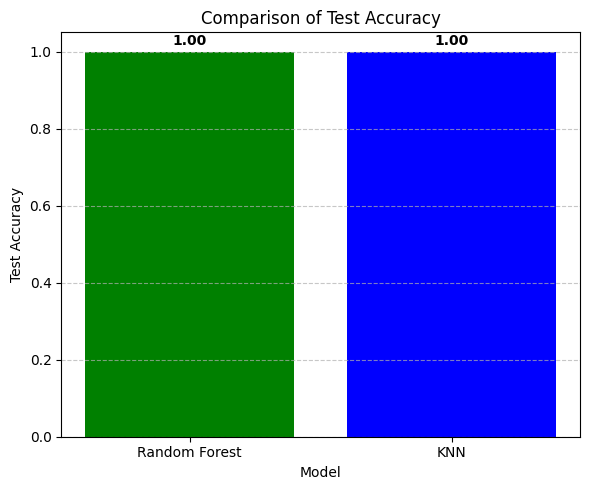

In [35]:
models = ['Random Forest', 'KNN']
best_accuracy_test_RF = accuracy_score(y_train, y_train_pred_best_rf)
best_accuracy_test_KNN = accuracy_score(y_train, y_train_pred_best_knn)
test_accuracies = [best_accuracy_test_RF, best_accuracy_test_KNN]
test_accuracies = [best_accuracy_test_RF, best_accuracy_test_KNN]

colors = ['green', 'blue']

plt.figure(figsize=(6, 5))
bars = plt.bar(models, test_accuracies, color=colors)

for bar, acc in zip(bars, test_accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{acc:.2f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy')
plt.ylim(0, 1.05) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model RF

In [36]:
print('classification report test :' )
print(classification_report(y_test, y_test_pred_best_rf, target_names=le.classes_))

classification report test :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00         6
        jute       0.88      1.00      0.94        15
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        1

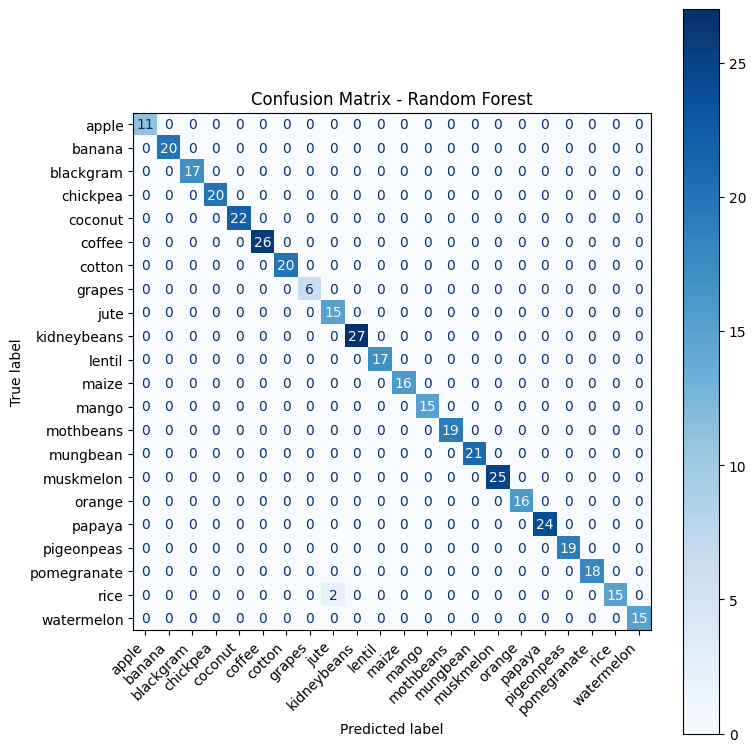

In [37]:
cm_RF = confusion_matrix(y_test, y_test_pred_best_rf)

disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))  
disp_RF.plot(cmap='Blues', ax=ax)

plt.xticks(rotation=45, ha='right') 
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

Model KNN

In [38]:
print('classification report test :' )
print(classification_report(y_test, y_test_pred_best_knn, target_names=le.classes_))

classification report test :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.94      0.97        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00         6
        jute       0.88      0.93      0.90        15
 kidneybeans       0.96      1.00      0.98        27
      lentil       0.85      1.00      0.92        17
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        1

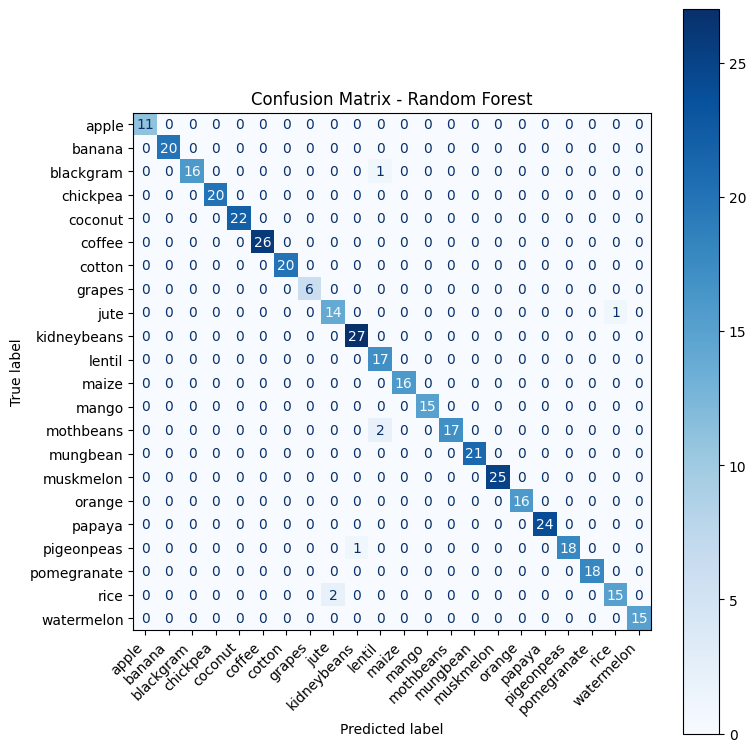

In [39]:
cm_KNN = confusion_matrix(y_test, y_test_pred_best_knn)

disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))  
disp_KNN.plot(cmap='Blues', ax=ax)

plt.xticks(rotation=45, ha='right') 
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()